In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('Boston.csv')

In [9]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
l = np.array(data.ix[:,'lstat'])
m = np.array(data.ix[:,'medv'])
data2 = np.stack((l,m), axis = 1)

Following ISLR, we will look at linear modeling the relationship between median house value (medv) and percentage of lower status population(lstat)

In [11]:
#Create place holders for the variable and the response
#tf.placeholder(dtype, shape = None, name = None)
lstat = tf.placeholder(tf.float32, name = "lstat")
medv = tf.placeholder(tf.float32, name = "medv")

Goal is to model the equation: $medv = Weights*lstat + Bias$

In [12]:
#Assign variables
# tf.Variable(initial_value = None, trainable = True, collections = None, name = None, dtype = None)
W = tf.Variable(0.0, name = "Slope")
b = tf.Variable(0.0, name = "Intercept")

In [13]:
# Model to predict medv value based on lstat
medv_pred = lstat * W + b

In [14]:
# Setting up the loss Equation
loss = tf.square(medv - medv_pred, name = "loss")

In [15]:
# Setting up gradient descent to learn effective value of W to minimize the loss value
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(loss)

In [16]:
# Running a tensorflow session 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        for l,m in data2:
            sess.run(optimizer, feed_dict = {lstat:l, medv:m})
    
    W_value, b_value = sess.run([W,b])
    writer = tf.summary.FileWriter('./LinRegGraphs', sess.graph)
writer.close() 

In [26]:
W_value

-1.6722647

In [27]:
b_value

36.283665

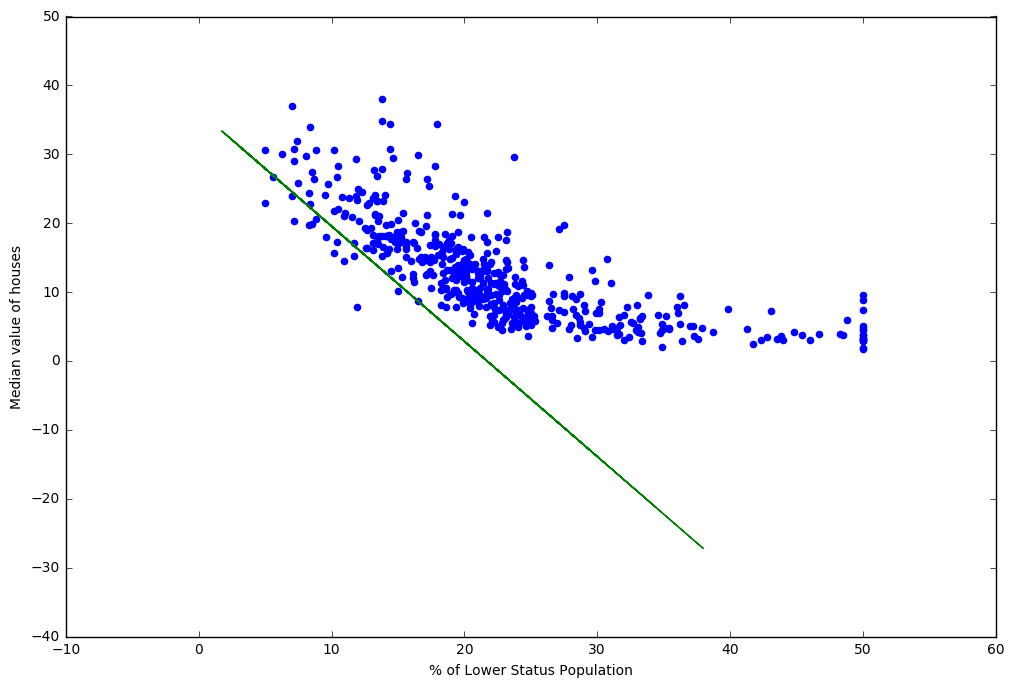

In [28]:
fig, ax = plt.subplots(1,1,figsize = (12,8))
ax.scatter(data['medv'],data['lstat'],color = "blue", marker = 'o')
ax.plot(data['lstat'], data['lstat']*W_value + b_value, color = "green")
ax.set_xlabel('% of Lower Status Population')
ax.set_ylabel('Median value of houses')

In [29]:
#Just trying out standard leas squares
import statsmodels.formula.api as smf
lm = smf.ols(formula ="medv~lstat", data = data)
lmfit = lm.fit()
lmfit.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

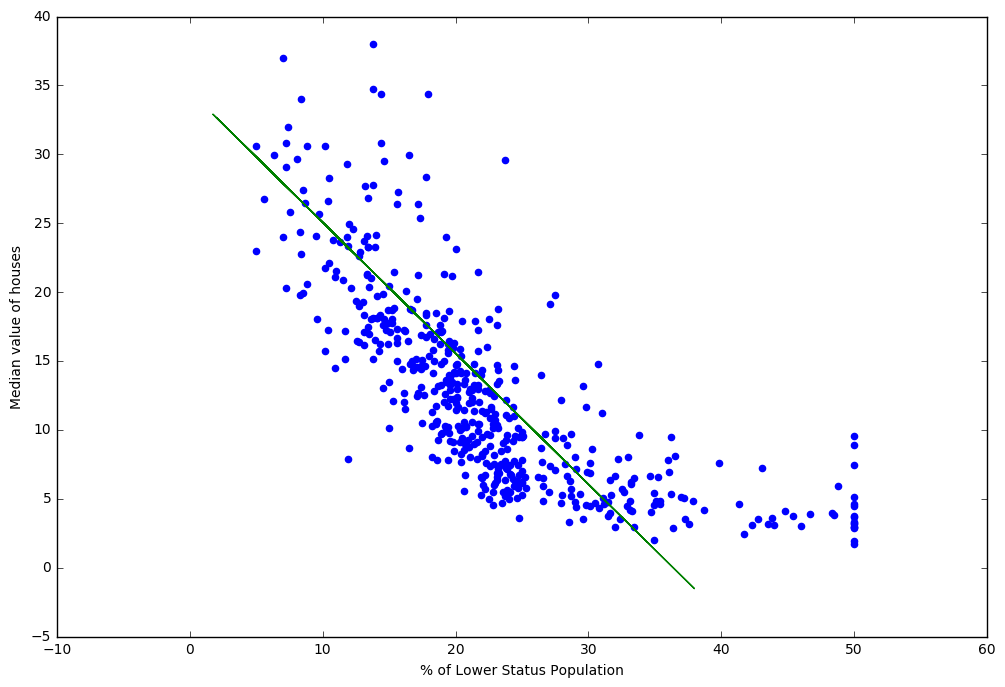

In [30]:
fig, ax = plt.subplots(1,1,figsize = (12,8))
ax.scatter(data['medv'],data['lstat'],color = "blue", marker = 'o')
ax.plot(data['lstat'], data['lstat']*(-0.950049) + 34.553841, color = "green")
ax.set_xlabel('% of Lower Status Population')
ax.set_ylabel('Median value of houses')